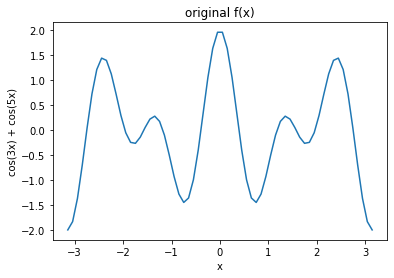

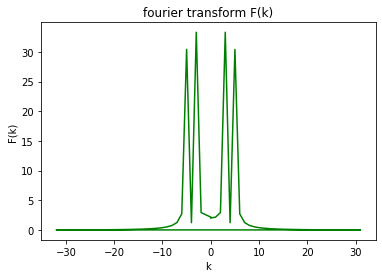

k= 3.0
k= 5.0
k= -5.0
k= -3.0


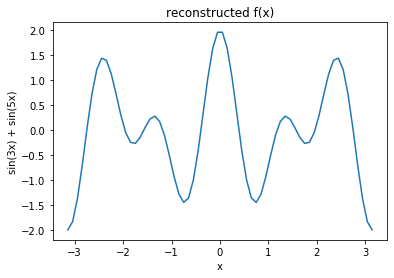

In [2]:
#Nicole Rider
#"Slow" Discrete Fourier Transform
#===========================================
import numpy as np
import matplotlib.pyplot as plt
#===========================================
#Calculates the forward or backward discrete Fourier transform of a function defined on an array
#    
# PARAMETERS:
#        array -- input function       
#        direction -- forward/backward
#             
# RETURNS:
#        sdft -- output

def sdft(array,direction):

    Nx = len(array)
    
    sdft = 1j*np.zeros(Nx)
    
    if (direction == "F"):
        for k in range(Nx):
            for x in range(Nx):
                phase = (2*np.pi/Nx)*k*x
                sdft[k]+=array[x]*np.exp(-1j*phase)
        
    if (direction == "B"):
        for x in range(Nx):
            for k in range(Nx):
                phase = (2*np.pi/Nx)*k*x
                sdft[x]+=array[k]*np.exp(1j*phase)
    
    return sdft

def main():

    J      = 64
    J_half = int(J/2)
    x      = np.linspace(-np.pi,np.pi,J)   #xj = jL/N
    
    k             = np.zeros(J)
    k[0:J_half]   = np.arange(0,J/2)       #wave number: K = 2*pi*k/L, L=2pi
    k[J_half:-1]  = np.arange(-J/2,-1)
    
    
    fx  = np.cos(3*x) + np.cos(5*x)
    
    Fk  = 1j*np.zeros(J)
    Fk  = sdft(fx, "F")
    
    fx_recon = sdft(Fk,"B")
    
    # x-space plot (spatial domain)
    plt.plot(x,fx)
    plt.title('original f(x)')
    plt.xlabel('x')
    plt.ylabel('cos(3x) + cos(5x)')
    plt.show()
    
    # k-space plot (frequency domain)
    plt.plot(k,np.abs((Fk).real),'g')#,'o')
    plt.title('fourier transform F(k)')
    plt.xlabel('k')
    plt.ylabel('F(k)')
    plt.show()
    # print values of k with high magnitude
    for i in range(J):
        if np.abs((Fk[i]).real) > 10:
            print('k=',k[i])
    
    # reconstructed x-space plot
    plt.plot(x,fx_recon/J)
    plt.title('reconstructed f(x)')
    plt.xlabel('x')
    plt.ylabel('sin(3x) + sin(5x)')
    plt.show()
#===========================================    
main()